# Práctica 1, Sesión 3: Modelos lineales generativos

**Notación:** $\quad\boldsymbol{x}\in\mathbb{R}^D\;$ y $\;y\in\{1,\dotsc,C\}\;$ salvo que se indique otra cosa

**Clasificador generativo:** $\;$ expresa **posteriors** en función de **priors** y **densidades condicionales** de las clases, las cuales puede muestrearse para **generar** datos sintéticos
$$p(y=c\mid\boldsymbol{x},\boldsymbol{\theta})=\frac{p(\boldsymbol{x}\mid y=c,\boldsymbol{\theta})\,p(y=c,\boldsymbol{\theta})}{\sum_{c'}p(\boldsymbol{x}\mid y=c',\boldsymbol{\theta})\,p(y=c',\boldsymbol{\theta})}%
\propto p(\boldsymbol{x}\mid y=c,\boldsymbol{\theta})\,p(y=c,\boldsymbol{\theta})$$

**Linealidad:** $\;$ la log-posterior suele ser lineal con $\boldsymbol{x},\,$ aunque en algunos es cuadrática

**Ajuste:** $\;$ la máximización de la log-verosimilitud conjunta suele conducir a estimadores fáciles de calcular mediante conteo y promediado
* Los priors de las clases se estiman como frecuencias relativas, $\,\hat{\pi}_c=N_c/N$
* Los parámetros de cada clase se estiman con sus datos de entrenamiento (salvo $\mathbf{\Sigma}$ en LDA, que se estima con todos)

## 1. Naive Bayes

**Clasificador naive Bayes Gaussiano (GNB):** $\;\boldsymbol{\theta}_c=(\boldsymbol{\theta}_{c1},\dotsc,\boldsymbol{\theta}_{cD})^t,\,\boldsymbol{\theta}_{cd}=(\mu_{cd},\sigma_{cd}^2),\,$ media y varianza de la característica $d$ en $c$
$$p(\boldsymbol{x}\mid y=c,\boldsymbol{\theta}_c)=\prod_{d=1}^D \mathcal{N}(x_d\mid\mu_{cd},\sigma_{cd}^2)%
\qquad\text{con}\qquad%
\hat{\mu}_{cd}=\frac{1}{N_c}\sum_{n:y_n=c}x_{nd}\quad\text{y}\quad%
\hat{\sigma}_{cd}^2=\frac{1}{N_c}\sum_{n:y_n=c}(x_{nd}-\hat{\mu}_{cd})^2$$

**Aplicación a iris:** $\;$ con suavizado de varianzas añadiendo un porcentaje, `var_smoothing`, de la mayor varianza empírica hallada (1e-9 por omisión)

In [15]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris; from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB; from sklearn.metrics import accuracy_score
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
clf = GaussianNB(var_smoothing=1e-9).fit(X_train, y_train)
acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de GaussianNB() es 93.3%


**Ejercicio:** $\;$ estudia el efecto de `var_smoothing` sobre la precisión de GNB

In [18]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris; from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB; from sklearn.metrics import accuracy_score
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1e-3, 1e-6, 1e-12, 1e-16]:
    clf = GaussianNB(var_smoothing=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de GaussianNB(var_smoothing=10) es 80.0%
La precisión de GaussianNB(var_smoothing=9) es 80.0%
La precisión de GaussianNB(var_smoothing=8) es 83.3%
La precisión de GaussianNB(var_smoothing=7) es 83.3%
La precisión de GaussianNB(var_smoothing=6) es 86.7%
La precisión de GaussianNB(var_smoothing=5) es 90.0%
La precisión de GaussianNB(var_smoothing=4) es 90.0%
La precisión de GaussianNB(var_smoothing=3) es 90.0%
La precisión de GaussianNB(var_smoothing=2) es 90.0%
La precisión de GaussianNB(var_smoothing=1) es 86.7%
La precisión de GaussianNB(var_smoothing=0.001) es 93.3%
La precisión de GaussianNB(var_smoothing=1e-06) es 93.3%
La precisión de GaussianNB(var_smoothing=1e-12) es 93.3%
La precisión de GaussianNB(var_smoothing=1e-16) es 93.3%


**Ejercicio:** $\;$ estudia el efecto de `var_smoothing` sobre la precisión de GNB en digits y olivetti

In [20]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.datasets import load_digits; from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB; from sklearn.metrics import accuracy_score
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1e-3, 1e-6, 1e-12, 1e-16]:
    clf = GaussianNB(var_smoothing=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de GaussianNB(var_smoothing=10) es 86.1%
La precisión de GaussianNB(var_smoothing=9) es 86.1%
La precisión de GaussianNB(var_smoothing=8) es 86.1%
La precisión de GaussianNB(var_smoothing=7) es 86.4%
La precisión de GaussianNB(var_smoothing=6) es 86.7%
La precisión de GaussianNB(var_smoothing=5) es 86.7%
La precisión de GaussianNB(var_smoothing=4) es 86.7%
La precisión de GaussianNB(var_smoothing=3) es 87.2%
La precisión de GaussianNB(var_smoothing=2) es 87.8%
La precisión de GaussianNB(var_smoothing=1) es 89.4%
La precisión de GaussianNB(var_smoothing=0.001) es 89.7%
La precisión de GaussianNB(var_smoothing=1e-06) es 87.8%
La precisión de GaussianNB(var_smoothing=1e-12) es 75.3%
La precisión de GaussianNB(var_smoothing=1e-16) es 67.2%


In [21]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_olivetti_faces; from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB; from sklearn.metrics import accuracy_score
X, y = fetch_olivetti_faces(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1e-3, 1e-6, 1e-12, 1e-16]:
    clf = GaussianNB(var_smoothing=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de GaussianNB(var_smoothing=10) es 73.8%
La precisión de GaussianNB(var_smoothing=9) es 75.0%
La precisión de GaussianNB(var_smoothing=8) es 75.0%
La precisión de GaussianNB(var_smoothing=7) es 75.0%
La precisión de GaussianNB(var_smoothing=6) es 75.0%
La precisión de GaussianNB(var_smoothing=5) es 75.0%
La precisión de GaussianNB(var_smoothing=4) es 78.8%
La precisión de GaussianNB(var_smoothing=3) es 78.8%
La precisión de GaussianNB(var_smoothing=2) es 78.8%
La precisión de GaussianNB(var_smoothing=1) es 83.8%
La precisión de GaussianNB(var_smoothing=0.001) es 87.5%
La precisión de GaussianNB(var_smoothing=1e-06) es 85.0%
La precisión de GaussianNB(var_smoothing=1e-12) es 85.0%
La precisión de GaussianNB(var_smoothing=1e-16) es 85.0%


## 2. Análisis discriminante lineal (LDA)

**LDA:** $\;\boldsymbol{\theta}_c=(\boldsymbol{\mu}_c^t,\,\operatorname{vec}(\mathbf{\Sigma}))^t,\,$ media de la clase $c$ y matriz de varianzas común para todas las clases
$$p(\boldsymbol{x}\mid y=c,\boldsymbol{\theta}_c)=\mathcal{N}(\boldsymbol{x}_n\mid \boldsymbol{\mu}_c,\mathbf{\Sigma})
\qquad\text{con}\qquad%
\hat{\boldsymbol{\mu}}_c=\frac{1}{N_c}\sum_{n:y_n=c}\boldsymbol{x}_n\quad\text{y}\quad%
\hat{\mathbf{\Sigma}}=\frac{1}{N}\sum_c\sum_{n:y_n=c}(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)^t$$

**Aplicación a iris:** $\;$ con suavizado de la matriz de varianzas mediante un parámetro `tol` que controla su fuerza (1e-4 por omisión)

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris; X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
clf = LinearDiscriminantAnalysis(tol=1e-4).fit(X_train, y_train)
acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de LinearDiscriminantAnalysis() es 96.7%


In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris; X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    clf = LinearDiscriminantAnalysis(tol=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de LinearDiscriminantAnalysis(tol=1) es 26.7%
La precisión de LinearDiscriminantAnalysis(tol=0) es 96.7%
La precisión de LinearDiscriminantAnalysis(tol=0.1) es 96.7%
La precisión de LinearDiscriminantAnalysis(tol=0.01) es 96.7%
La precisión de LinearDiscriminantAnalysis(tol=0.001) es 96.7%
La precisión de LinearDiscriminantAnalysis() es 96.7%
La precisión de LinearDiscriminantAnalysis(tol=1e-05) es 96.7%
La precisión de LinearDiscriminantAnalysis(tol=1e-06) es 96.7%


In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_digits; X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    clf = LinearDiscriminantAnalysis(tol=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de LinearDiscriminantAnalysis(tol=1) es 8.1%
La precisión de LinearDiscriminantAnalysis(tol=0) es 80.6%
La precisión de LinearDiscriminantAnalysis(tol=0.1) es 95.0%
La precisión de LinearDiscriminantAnalysis(tol=0.01) es 95.0%
La precisión de LinearDiscriminantAnalysis(tol=0.001) es 95.0%
La precisión de LinearDiscriminantAnalysis() es 95.0%
La precisión de LinearDiscriminantAnalysis(tol=1e-05) es 95.0%
La precisión de LinearDiscriminantAnalysis(tol=1e-06) es 95.0%


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import fetch_olivetti_faces; X, y = fetch_olivetti_faces(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    clf = LinearDiscriminantAnalysis(tol=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de LinearDiscriminantAnalysis(tol=1) es 0.0%
La precisión de LinearDiscriminantAnalysis(tol=0) es 85.0%
La precisión de LinearDiscriminantAnalysis(tol=0.1) es 98.8%
La precisión de LinearDiscriminantAnalysis(tol=0.01) es 98.8%
La precisión de LinearDiscriminantAnalysis(tol=0.001) es 98.8%
La precisión de LinearDiscriminantAnalysis() es 98.8%
La precisión de LinearDiscriminantAnalysis(tol=1e-05) es 98.8%
La precisión de LinearDiscriminantAnalysis(tol=1e-06) es 85.0%


**Ejercicio:** $\;$ estudia el efecto de `tol` sobre la precisión de LDA en iris, digits y olivetti

## 3. Análisis discriminante cuadrático (QDA)

**QDA:** $\;\boldsymbol{\theta}_c=(\boldsymbol{\mu}_c^t,\,\operatorname{vec}(\mathbf{\Sigma}_c))^t,\,$ media y matriz de varianzas de la clase $c$
$$p(\boldsymbol{x}\mid y=c,\boldsymbol{\theta}_c)=\mathcal{N}(\boldsymbol{x}_n\mid \boldsymbol{\mu}_c,\mathbf{\Sigma}_c)
\qquad\text{con}\qquad%
\hat{\boldsymbol{\mu}}_c=\frac{1}{N_c}\sum_{n:y_n=c}\boldsymbol{x}_n\quad\text{y}\quad%
\hat{\mathbf{\Sigma}}_c=\frac{1}{N_c}\sum_{n:y_n=c}(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)^t$$

**Aplicación a iris:** $\;$ `reg_param` suaviza matrices de varianzas mediante interpolación con $\mathbf{I}$ (0, valor por omisión, no suaviza; 1 identidad)

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris; from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
clf = QuadraticDiscriminantAnalysis(reg_param=0.0).fit(X_train, y_train)
acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de QuadraticDiscriminantAnalysis() es 96.7%


**Ejercicio:** $\;$ estudia el efecto de `reg_param` sobre la precisión de QDA en iris, digits y olivetti

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris; from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for reg_paragm in [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    clf = QuadraticDiscriminantAnalysis(reg_param=reg_paragm).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')


La precisión de QuadraticDiscriminantAnalysis() es 96.7%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.1) es 93.3%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.2) es 93.3%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.4) es 93.3%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.6) es 90.0%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.8) es 90.0%
La precisión de QuadraticDiscriminantAnalysis(reg_param=1.0) es 90.0%


In [31]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_digits; from sklearn.model_selection import train_test_split
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for reg_paragm in [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    clf = QuadraticDiscriminantAnalysis(reg_param=reg_paragm).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de QuadraticDiscriminantAnalysis() es 86.9%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.1) es 96.7%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.2) es 98.1%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.4) es 98.9%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.6) es 99.4%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.8) es 99.4%
La precisión de QuadraticDiscriminantAnalysis(reg_param=1.0) es 89.2%


In [30]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import fetch_olivetti_faces; from sklearn.model_selection import train_test_split
X, y = fetch_olivetti_faces(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for reg_paragm in [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    clf = QuadraticDiscriminantAnalysis(reg_param=reg_paragm).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de QuadraticDiscriminantAnalysis() es 6.2%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.1) es 6.2%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.2) es 3.8%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.4) es 1.2%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.6) es 1.2%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.8) es 3.8%
La precisión de QuadraticDiscriminantAnalysis(reg_param=1.0) es 2.5%


## 4. Generación de datos sintéticos (opcional)

**digits:** $\;$ QDA con `reg_param=0.9` obtiene un $99.7\%$ de precisión

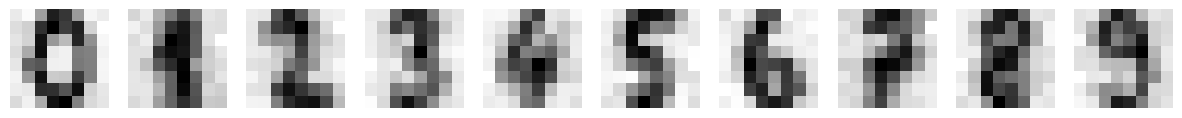

In [4]:
import matplotlib.pyplot as plt; from scipy.stats import multivariate_normal
from sklearn.datasets import load_digits; X, y = load_digits(return_X_y=True)
clf = QuadraticDiscriminantAnalysis(reg_param=0.9, store_covariance=True).fit(X, y)
fig, axs = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    ax = axs[i]; ax.set_axis_off()
    Z = multivariate_normal(mean=clf.means_[i], cov=clf.covariance_[i], seed=23).rvs(1)
    ax.imshow(Z.reshape(8,8), cmap=plt.cm.gray_r, interpolation="none")

**Ejercicio:** $\;$ genera caras sintéticas con olivetti y LDA ($98.8\%$ de acierto)

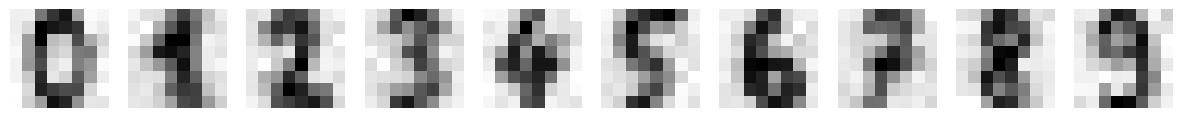

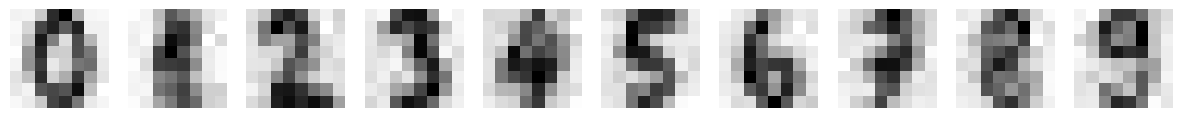

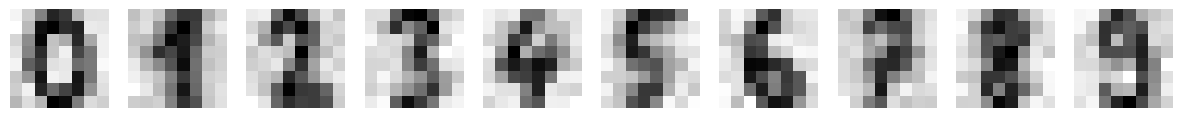

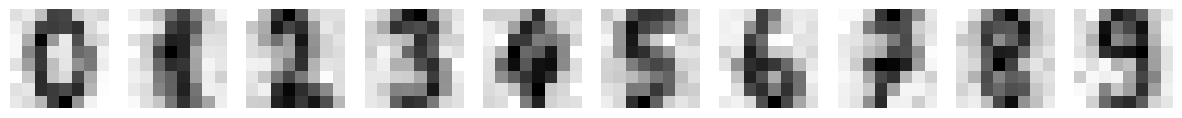

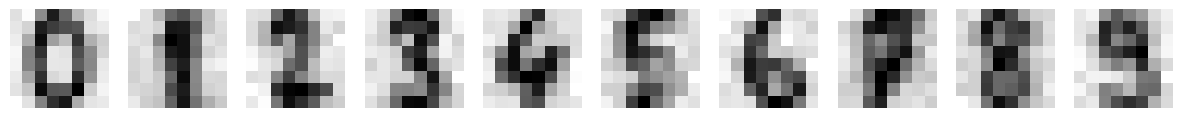

In [33]:
import matplotlib.pyplot as plt; from scipy.stats import multivariate_normal
from sklearn.datasets import load_digits; X, y = load_digits(return_X_y=True)
clf = QuadraticDiscriminantAnalysis(reg_param=0.9, store_covariance=True).fit(X, y)
for seed in [1,2,3,4,5]:
    fig, axs = plt.subplots(1, 10, figsize=(15, 15))
    for i in range(10):
        ax = axs[i]; ax.set_axis_off()
        Z = multivariate_normal(mean=clf.means_[i], cov=clf.covariance_[i], seed=seed).rvs(1)
        ax.imshow(Z.reshape(8,8), cmap=plt.cm.gray_r, interpolation="none")